In [1]:
!pip install h2o

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.9.1" 2020-11-04; OpenJDK Runtime Environment (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmporjv2gl5
  JVM stdout: /tmp/tmporjv2gl5/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmporjv2gl5/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.2
H2O_cluster_version_age:,1 month and 9 days
H2O_cluster_name:,H2O_from_python_unknownUser_scjtwz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [3]:
df=pd.read_excel('/content/Apto-Set16-Out20.xls',sheet_name='Sheet1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10283 entries, 0 to 10282
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NI           10283 non-null  object 
 1   End          10283 non-null  object 
 2   Complemento  10283 non-null  object 
 3   Bairro       10282 non-null  object 
 4   Informante   10276 non-null  object 
 5   Telefone     10276 non-null  object 
 6   Lat          10283 non-null  object 
 7   Long         10283 non-null  object 
 8   Area         10283 non-null  float64
 9   Ofer-Trans   10283 non-null  int64  
 10  Faixa-Idade  10283 non-null  object 
 11  Data         10283 non-null  int64  
 12  Vagas        10277 non-null  float64
 13  Andar        10281 non-null  float64
 14  Cons-Unid    10283 non-null  int64  
 15  Cons-Predio  10278 non-null  float64
 16  Pad-Unid     10283 non-null  int64  
 17  Pad-Predio   10278 non-null  float64
 18  Quartos      10283 non-null  int64  
 19  WCS 

In [4]:
municipio="FORTALEZA"

In [5]:
#municipio = input("Qual o Municipio? ")
df=df[(df.Municipio == municipio)]


In [6]:
df.columns

Index(['NI', 'End', 'Complemento', 'Bairro', 'Informante', 'Telefone', 'Lat',
       'Long', 'Area', 'Ofer-Trans', 'Faixa-Idade', 'Data', 'Vagas', 'Andar',
       'Cons-Unid', 'Cons-Predio', 'Pad-Unid', 'Pad-Predio', 'Quartos', 'WCS',
       'Elevadores', 'Renda', 'Valor-Total', 'Portaria', 'Piscina', 'Esporte',
       'Home-Club', 'Valor-Unit', 'Municipio', 'Regional', 'Empresa', 'Idade'],
      dtype='object')

In [7]:
df.drop(['NI', 'End','Faixa-Idade', 'Complemento', 'Bairro', 'Informante', 'Telefone','Municipio', 'Regional', 'Empresa'],axis=1,inplace=True)
df

,Lat,Long,Area,Ofer-Trans,Data,Vagas,Andar,Cons-Unid,Cons-Predio,Pad-Unid,Pad-Predio,Quartos,WCS,Elevadores,Renda,Valor-Total,Portaria,Piscina,Esporte,Home-Club,Valor-Unit,Idade
0,-3.77374,-38.4662,62.00,2,211,1.0,1.0,3,3.0,4,4.0,3,3,0.0,1647.50,130000.0,1,0,0,0,2096.77,35
1,-3.74171,-38.4891,87.00,2,211,3.0,1.0,5,2.0,4,4.0,3,1,1.0,2733.63,340000.0,1,0,0,0,3908.05,1
2,-3.70567,-38.5934,43.83,2,231,1.0,1.0,5,5.0,3,3.0,2,1,0.0,2245.10,150000.0,0,0,1,0,3422.31,7
3,-3.70567,-38.5934,43.83,2,231,1.0,1.0,5,5.0,3,3.0,2,2,0.0,2245.10,150000.0,0,0,1,0,3422.31,7
4,-3.75944,-38.4431,59.00,1,204,1.0,1.0,6,6.0,5,5.0,2,2,4.0,3301.00,300000.0,1,0,1,0,5119.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10273,"-3,795675","-38,613822",62.00,2,222,1.0,3.0,5,5.0,4,4.0,3,1,0.0,856.70,128000.0,0,0,0,0,2064.52,7
10275,"-3,722187","-38,510971",98.98,1,217,2.0,6.0,6,6.0,5,5.0,3,3,3.0,4065.44,570000.0,1,1,1,0,5758.74,1
10276,"-3,79575","-38,53725",45.37,1,221,1.0,4.0,5,3.0,4,4.0,2,1,0.0,3038.00,130000.0,1,0,0,0,2865.33,15
10278,"-3,74014","-38,481345",69.50,2,221,1.0,21.0,6,6.0,6,5.0,3,2,2.0,7021.44,360000.0,1,1,1,0,5179.86,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5565 entries, 0 to 10281
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Lat          5565 non-null   object 
 1   Long         5565 non-null   object 
 2   Area         5565 non-null   float64
 3   Ofer-Trans   5565 non-null   int64  
 4   Data         5565 non-null   int64  
 5   Vagas        5561 non-null   float64
 6   Andar        5564 non-null   float64
 7   Cons-Unid    5565 non-null   int64  
 8   Cons-Predio  5560 non-null   float64
 9   Pad-Unid     5565 non-null   int64  
 10  Pad-Predio   5560 non-null   float64
 11  Quartos      5565 non-null   int64  
 12  WCS          5565 non-null   int64  
 13  Elevadores   5560 non-null   float64
 14  Renda        5564 non-null   float64
 15  Valor-Total  5565 non-null   float64
 16  Portaria     5565 non-null   int64  
 17  Piscina      5565 non-null   int64  
 18  Esporte      5565 non-null   int64  
 19  Home-

In [9]:
df['Lat']=df['Lat'].astype(str)
df['Lat']=df['Lat'].str.replace(',','.')
df['Lat']=df['Lat'].astype(float)

df['Long']=df['Long'].astype(str)
df['Long']=df['Long'].str.replace(',','.')
df['Long']=df['Long'].astype(float)

df_cat = df[['Ofer-Trans', 'Cons-Predio',  'Pad-Predio', 'Portaria', 'Piscina', 'Esporte','Home-Club']]
df_cont=df[['Data', 'Vagas', 'Andar','Quartos', 'WCS', 'Elevadores', 'Renda', 'Valor-Total','Valor-Unit','Idade']]

df_cont

,Data,Vagas,Andar,Quartos,WCS,Elevadores,Renda,Valor-Total,Valor-Unit,Idade
0,211,1.0,1.0,3,3,0.0,1647.50,130000.0,2096.77,35
1,211,3.0,1.0,3,1,1.0,2733.63,340000.0,3908.05,1
2,231,1.0,1.0,2,1,0.0,2245.10,150000.0,3422.31,7
3,231,1.0,1.0,2,2,0.0,2245.10,150000.0,3422.31,7
4,204,1.0,1.0,2,2,4.0,3301.00,300000.0,5119.00,1
...,...,...,...,...,...,...,...,...,...,...
10273,222,1.0,3.0,3,1,0.0,856.70,128000.0,2064.52,7
10275,217,2.0,6.0,3,3,3.0,4065.44,570000.0,5758.74,1
10276,221,1.0,4.0,2,1,0.0,3038.00,130000.0,2865.33,15
10278,221,1.0,21.0,3,2,2.0,7021.44,360000.0,5179.86,1


In [10]:
df.isnull().sum().sort_values(ascending=False)

Pad-Predio     5
Elevadores     5
Cons-Predio    5
Vagas          4
Renda          1
Andar          1
Pad-Unid       0
Long           0
Area           0
Ofer-Trans     0
Data           0
Cons-Unid      0
Idade          0
Valor-Unit     0
Quartos        0
WCS            0
Valor-Total    0
Portaria       0
Piscina        0
Esporte        0
Home-Club      0
Lat            0
dtype: int64

In [11]:
df.dropna(axis=0,inplace=True)
df.isnull().sum()

Lat            0
Long           0
Area           0
Ofer-Trans     0
Data           0
Vagas          0
Andar          0
Cons-Unid      0
Cons-Predio    0
Pad-Unid       0
Pad-Predio     0
Quartos        0
WCS            0
Elevadores     0
Renda          0
Valor-Total    0
Portaria       0
Piscina        0
Esporte        0
Home-Club      0
Valor-Unit     0
Idade          0
dtype: int64

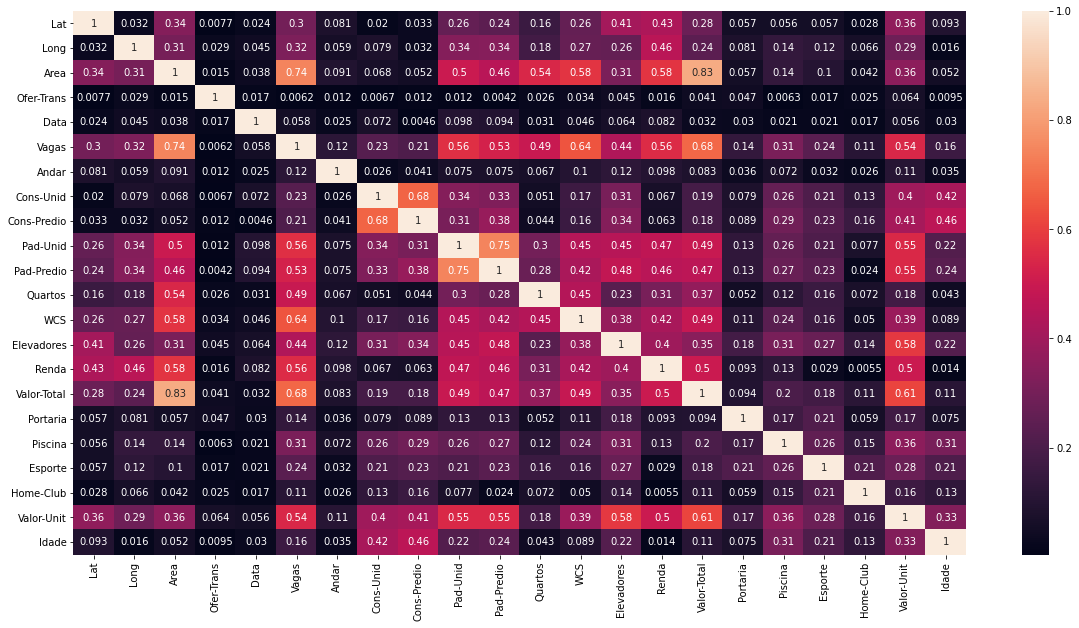

In [12]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

In [13]:
df = h2o.H2OFrame(df)
df

Parse progress: |█████████████████████████████████████████████████████████| 100%


Lat,Long,Area,Ofer-Trans,Data,Vagas,Andar,Cons-Unid,Cons-Predio,Pad-Unid,Pad-Predio,Quartos,WCS,Elevadores,Renda,Valor-Total,Portaria,Piscina,Esporte,Home-Club,Valor-Unit,Idade
-3.77374,-38.4662,62,2,211,1,1,3,3,4,4,3,3,0,1647.5,130000,1,0,0,0,2096.77,35
-3.74171,-38.4891,87,2,211,3,1,5,2,4,4,3,1,1,2733.63,340000,1,0,0,0,3908.05,1
-3.70567,-38.5934,43.83,2,231,1,1,5,5,3,3,2,1,0,2245.1,150000,0,0,1,0,3422.31,7
-3.70567,-38.5934,43.83,2,231,1,1,5,5,3,3,2,2,0,2245.1,150000,0,0,1,0,3422.31,7
-3.75944,-38.4431,59,1,204,1,1,6,6,5,5,2,2,4,3301,300000,1,0,1,0,5119,1
-3.7336,-38.5674,59.4,2,211,1,2,5,3,4,4,3,1,0,5511.5,215000,1,1,0,0,3619.53,35
-3.76056,-38.5592,45,2,200,1,2,3,5,4,3,2,3,0,2792,149000,1,0,0,0,3292,15
-3.73754,-38.5043,168.35,2,221,2,2,5,6,4,4,3,2,2,10865.7,500000,1,0,0,0,2970,35
-3.8282,-38.4916,58.85,2,204,1,3,6,3,4,4,3,1,0,2391,140000,1,0,1,0,2378.93,35
-3.71325,-38.6002,46.3,2,211,1,3,3,3,4,3,2,2,0,1699.78,110000,1,0,1,0,2375.81,15


In [14]:
y='Valor-Unit'

In [15]:
splits = df.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

Run AutoML
Run AutoML, stopping after 60 seconds. The max_runtime_secs argument provides a way to limit the AutoML run by time. When using a time-limited stopping criterion, the number of models train will vary between runs. If different hardware is used or even if the same machine is used but the available compute resources on that machine are not the same between runs, then AutoML may be able to train more models on one run vs another.
The test frame is passed explicitly to the leaderboard_frame argument here, which means that instead of using cross-validated metrics, we use test set metrics for generating the leaderboard.

In [16]:
aml = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "Apto")
aml.train(y = y, training_frame = train, leaderboard_frame = test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


For demonstration purposes, we will also execute a second AutoML run, this time providing the original, full dataset, df (without passing a leaderboard_frame). This is a more efficient use of our data since we can use 100% of the data for training, rather than 80% like we did above. This time our leaderboard will use cross-validated metrics.
Note: Using an explicit leaderboard_frame for scoring may be useful in some cases, which is why the option is available.

In [19]:
aml2 = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "Apto")
aml2.train(y = y, training_frame = df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


Leaderboard
Next, we will view the AutoML Leaderboard. Since we specified a leaderboard_frame in the H2OAutoML.train() method for scoring and ranking the models, the AutoML leaderboard uses the performance on this data to rank the models.
After viewing the "powerplant_lb_frame" AutoML project leaderboard, we compare that to the leaderboard for the "powerplant_full_data" project. We can see that the results are better when the full dataset is used for training.
A default performance metric for each machine learning task (binary classification, multiclass classification, regression) is specified internally and the leaderboard will be sorted by that metric. In the case of regression, the default ranking metric is mean residual deviance. In the future, the user will be able to specify any of the H2O metrics so that different metrics can be used to generate rankings on the leaderboard.

Now we will view a snapshot of the top models. Here we should see the two Stacked Ensembles at or near the top of the leaderboard. Stacked Ensembles can almost always outperform a single model

In [20]:
aml.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20201226_173515,42266.2,205.588,42266.2,115.799,0.0464508
StackedEnsemble_BestOfFamily_AutoML_20201226_173515,46824,216.389,46824,112.691,0.0486977
XGBoost_grid__1_AutoML_20201226_173515_model_1,47544.1,218.046,47544.1,109.387,0.0494615
XGBoost_grid__1_AutoML_20201226_173515_model_2,94275,307.042,94275,171.878,0.0701892
GBM_grid__1_AutoML_20201226_173515_model_1,167862,409.709,167862,290.768,0.0886408
XGBoost_3_AutoML_20201226_173515,182291,426.956,182291,295.742,0.0867455
XRT_1_AutoML_20201226_173515,464033,681.199,464033,372.149,0.150849
XGBoost_2_AutoML_20201226_173515,466457,682.977,466457,544.913,0.145182
DRF_1_AutoML_20201226_173515,478374,691.646,478374,353.761,0.138974
DeepLearning_grid__1_AutoML_20201226_173515_model_1,597836,773.199,597836,500.986,0.160738


Predict Using Leader Model
If you need to generate predictions on a test set, you can make predictions on the "H2OAutoML" object directly, or on the leader model object.

In [21]:

pred = aml.predict(test)
pred.head()

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict
3405.05
2260.7
3276.05
3006.45
2533.94
2550.33
2750.52
2849.96
2736.39
3764.72


If needed, the standard model_performance() method can be applied to the AutoML leader model and a test set to generate an H2O model performance object.

In [22]:
test

Lat,Long,Area,Ofer-Trans,Data,Vagas,Andar,Cons-Unid,Cons-Predio,Pad-Unid,Pad-Predio,Quartos,WCS,Elevadores,Renda,Valor-Total,Portaria,Piscina,Esporte,Home-Club,Valor-Unit,Idade
-3.70567,-38.5934,43.83,2,231,1,1,5,5,3,3,2,1,0,2245.1,150000,0,0,1,0,3422.31,7
-3.71325,-38.6002,46.3,2,211,1,3,3,3,4,3,2,2,0,1699.78,110000,1,0,1,0,2375.81,15
-3.71257,-38.5713,52.64,1,223,0,0,6,6,4,3,2,2,2,1600,170000,1,0,0,0,3229.48,1
-3.82778,-38.4929,58.85,1,206,1,0,5,3,3,3,3,1,0,2975,180000,1,1,1,0,3058.62,35
-3.83129,-38.5637,69.13,2,207,1,0,5,5,4,4,2,2,0,1271.8,160000,1,0,0,0,2314.48,7
-3.87028,-38.5208,45.7,2,216,1,0,6,5,3,4,2,2,0,1323,130000,1,0,1,0,2844.64,1
-3.80294,-38.5322,55.05,1,217,1,0,3,5,4,4,2,2,0,3379,150000,1,0,0,0,2724.8,15
-3.81642,-38.4699,63.6,1,218,1,0,6,6,4,4,3,1,0,1980,185000,0,0,0,0,2908.81,1
-3.81704,-38.47,63.6,2,218,1,0,6,6,4,3,3,2,0,1979.8,175000,0,0,0,0,2751.57,1
-3.77186,-38.5718,51.62,2,221,1,0,5,6,4,3,2,2,0,1934,195000,1,0,1,0,3777.61,1


In [ ]:

perf = aml.leader.model_performance(test)
perf


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 2537577.3897455176
RMSE: 1592.977523302045
MAE: 1213.1074781614486
RMSLE: 0.36261459935597434
R^2: 0.25558364758965113
Mean Residual Deviance: 2537577.3897455176
Null degrees of freedom: 499
Residual degrees of freedom: 493
Null deviance: 1705509728.1138616
Residual deviance: 1268788694.8727589
AIC: 8808.29873334917


In [23]:
resultados=test
resultados['Vlr_prev']=pred

In [24]:
resultados

Lat,Long,Area,Ofer-Trans,Data,Vagas,Andar,Cons-Unid,Cons-Predio,Pad-Unid,Pad-Predio,Quartos,WCS,Elevadores,Renda,Valor-Total,Portaria,Piscina,Esporte,Home-Club,Valor-Unit,Idade,Vlr_prev
-3.70567,-38.5934,43.83,2,231,1,1,5,5,3,3,2,1,0,2245.1,150000,0,0,1,0,3422.31,7,3405.05
-3.71325,-38.6002,46.3,2,211,1,3,3,3,4,3,2,2,0,1699.78,110000,1,0,1,0,2375.81,15,2260.7
-3.71257,-38.5713,52.64,1,223,0,0,6,6,4,3,2,2,2,1600,170000,1,0,0,0,3229.48,1,3276.05
-3.82778,-38.4929,58.85,1,206,1,0,5,3,3,3,3,1,0,2975,180000,1,1,1,0,3058.62,35,3006.45
-3.83129,-38.5637,69.13,2,207,1,0,5,5,4,4,2,2,0,1271.8,160000,1,0,0,0,2314.48,7,2533.94
-3.87028,-38.5208,45.7,2,216,1,0,6,5,3,4,2,2,0,1323,130000,1,0,1,0,2844.64,1,2550.33
-3.80294,-38.5322,55.05,1,217,1,0,3,5,4,4,2,2,0,3379,150000,1,0,0,0,2724.8,15,2750.52
-3.81642,-38.4699,63.6,1,218,1,0,6,6,4,4,3,1,0,1980,185000,0,0,0,0,2908.81,1,2849.96
-3.81704,-38.47,63.6,2,218,1,0,6,6,4,3,3,2,0,1979.8,175000,0,0,0,0,2751.57,1,2736.39
-3.77186,-38.5718,51.62,2,221,1,0,5,6,4,3,2,2,0,1934,195000,1,0,1,0,3777.61,1,3764.72
